In [145]:
%reset -f
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
from scipy import stats
from sklearn.metrics import r2_score

asym_pulse = pd.read_csv('./MLdata/asym_pulse.txt',  sep=' ', header=None)
asym_timesteps = pd.read_csv('./MLdata/asym_timesteps.txt',  sep=' ', header=None)

c_pulse = pd.read_csv('./MLdata/c_pulse.txt',  sep=' ', header=None)
c_timesteps = pd.read_csv('./MLdata/c_timesteps.txt',  sep=' ', header=None)

pi_pulse = pd.read_csv('./MLdata/pi_pulse.txt',  sep=' ', header=None)
pi_timesteps = pd.read_csv('./MLdata/pi_timesteps.txt',  sep=' ', header=None)

sc_pulse = pd.read_csv('./MLdata/sc_pulse.txt',  sep=' ', header=None)
sc_timesteps = pd.read_csv('./MLdata/sc_timesteps.txt',  sep=' ', header=None)

sym_pulse = pd.read_csv('./MLdata/sym_pulse.txt',  sep=' ', header=None)
sym_timesteps = pd.read_csv('./MLdata/sym_timesteps.txt',  sep=' ', header=None)

noise_0 = pd.read_csv('./MLdata/noise_0.txt',  sep=' ', header=None)
#x_axis = pd.read_csv('./02DataPulse/x_axis.txt',  sep=' ', header=None)



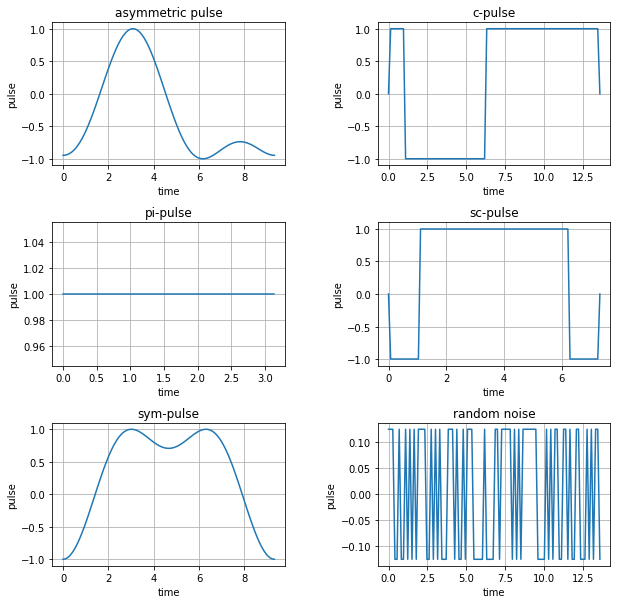

In [146]:
# plot with various axes scales
plt.figure(figsize=(10,10))

plt.figure(1)

plt.subplots_adjust(wspace=0.4, # wspace controls the width of space between subplots
                    hspace=0.4)  # hspace controls the hight of space between subplots

# asymmetric pulse
plt.subplot(321)
plt.plot(asym_timesteps,asym_pulse)
plt.xlabel('time')
plt.ylabel('pulse')
plt.title('asymmetric pulse')
plt.grid(True)

# c pulse
plt.subplot(322)
plt.plot(c_timesteps,c_pulse)
plt.xlabel('time')
plt.ylabel('pulse')
plt.title('c-pulse')
plt.grid(True)

# pi pulse
plt.subplot(323)
plt.plot(pi_timesteps,pi_pulse)
plt.xlabel('time')
plt.ylabel('pulse')
plt.title('pi-pulse')
plt.grid(True)

# sc pulse
plt.subplot(324)
plt.plot(sc_timesteps,sc_pulse)
plt.xlabel('time')
plt.ylabel('pulse')
plt.title('sc-pulse')
plt.grid(True)

# symmetric pulse
plt.subplot(325)
plt.plot(sym_timesteps,sym_pulse)
plt.xlabel('time')
plt.ylabel('pulse')
plt.title('sym-pulse')
plt.grid(True)
# noise
plt.subplot(326)
plt.plot(c_timesteps,noise_0)
plt.xlabel('time')
plt.ylabel('pulse')
plt.title('random noise')
plt.grid(True)

In [147]:
fids_asym = pd.read_csv('./MLdata/fids_asym.txt',  sep=' ', header=None,names = ['asym'])
fids_C = pd.read_csv('./MLdata/fids_C.txt',  sep=' ', header=None,names = ['C'])
fids_pi = pd.read_csv('./MLdata/fids_pi.txt',  sep=' ', header=None,names = ['pi'])
fids_SC = pd.read_csv('./MLdata/fids_SC.txt',  sep=' ', header=None,names = ['sc'])
fids_sym = pd.read_csv('./MLdata/fids_sym.txt',  sep=' ', header=None,names = ['sym'])
x_axis = pd.read_csv('./MLdata/x_axis.txt',  sep=' ', header=None,names = ['x'])



In [148]:
#df = fids_asym.drop(columns=[0])
#df = np.array(df)
#df=pd.DataFrame(list(df))
#df = pd.DataFrame(df)

#select column by using pandas
dfAsy= fids_asym.loc[ : , 'asym' ]
dfC= fids_C.loc[ : , 'C' ]
dfPi= fids_pi.loc[ : , 'pi' ]
dfSC= fids_SC.loc[ : , 'sc' ]
dfSym= fids_sym.loc[ : , 'sym' ]
dfx = x_axis.loc[:,'x']


In [149]:
sum(dfAsy)

489.19915127420563

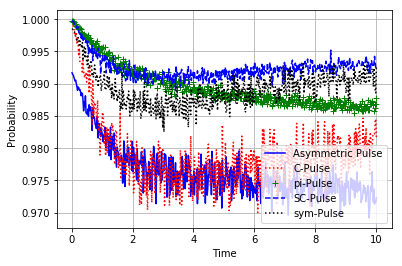

In [150]:
axes = plt.axes()
axes.grid()
plt.xlabel('Time')
plt.ylabel('Probability')
plt.plot(dfx, dfAsy, 'b-')
plt.plot(dfx, dfC, 'r:')
plt.plot(dfx, dfPi, 'g+')
plt.plot(dfx, dfSC, 'b--')
plt.plot(dfx, dfSym, 'k:')
plt.legend(['Asymmetric Pulse', 'C-Pulse','pi-Pulse','SC-Pulse','sym-Pulse'], loc=4)
plt.show()

In [151]:
#04: Mean, Median, Mode, and introducing NumPy
print(np.mean(dfAsy), np.mean(dfC), np.mean(dfPi), np.mean(dfSC), np.mean(dfSym))
print(np.median(dfAsy), np.median(dfC), np.median(dfPi), np.median(dfSC), np.median(dfSym))
print(stats.mode(dfAsy), stats.mode(dfC), stats.mode(dfPi), stats.mode(dfSC), stats.mode(dfSym))


0.9764454117249614 0.9790080454944797 0.9896218058470383 0.9924041721833696 0.9892395971580545
0.9752711329632986 0.9781809328644702 0.988447856639689 0.9921197673088648 0.9892099802150516
ModeResult(mode=array([0.96917825]), count=array([1])) ModeResult(mode=array([0.97002509]), count=array([1])) ModeResult(mode=array([0.9853798]), count=array([1])) ModeResult(mode=array([0.98890942]), count=array([1])) ModeResult(mode=array([0.98249229]), count=array([1]))


In [152]:
#05Standard Deviation and Variance
print(dfAsy.std(), dfC.std(), dfPi.std(), dfSC.std(), dfSym.std())
print(dfAsy.var(), dfC.var(), dfPi.var(), dfSC.var(), dfSym.var())

0.00427985118823804 0.005221249249635588 0.0033457667120571494 0.0017489447934415693 0.0026855433634413767
1.8317126193462565e-05 2.7261443726820192e-05 1.1194154891509707e-05 3.0588078905063735e-06 7.212143156924023e-06


In [153]:
#06Percentiles
print(np.percentile(dfAsy, 100), np.percentile(dfC, 100),np.percentile(dfPi, 100),np.percentile(dfSC, 100),np.percentile(dfSym, 100))

0.9916920584286116 0.999672420877012 0.9997867935333338 0.9998458444403572 0.998548733405144


In [154]:
#07Moments: Mean, Variance, Skew, Kurtosis
print(np.mean(dfAsy), np.mean(dfC), np.mean(dfPi), np.mean(dfSC), np.mean(dfSym))
print(np.var(dfAsy),np.var(dfC),np.var(dfPi),np.var(dfSC),np.var(dfSym))
print(sp.skew(dfAsy),sp.skew(dfC),sp.skew(dfPi),sp.skew(dfSC),sp.skew(dfSym))
print(sp.kurtosis(dfAsy),sp.kurtosis(dfC),sp.kurtosis(dfPi),sp.kurtosis(dfSC),sp.kurtosis(dfSym))


0.9764454117249614 0.9790080454944797 0.9896218058470383 0.9924041721833696 0.9892395971580545
1.8280565063335893e-05 2.720702966748522e-05 1.1171811268971762e-05 3.0527024855353032e-06 7.197747661600821e-06
1.4868942359660646 1.5613783075840815 1.2774777952604743 1.7815002196386616 0.7172380879795961
2.1118207524901393 3.2462564727584162 0.8248586020064619 4.3832702282964915 1.1147280053302868


In [155]:
#09Covariance and Correlation
print(np.cov(dfAsy,dfx), np.cov(dfC,dfx), np.cov(dfPi,dfx), np.cov(dfSC,dfx), np.cov(dfSym,dfx))
print(np.corrcoef(dfAsy,dfx), np.corrcoef(dfC,dfx), np.corrcoef(dfPi,dfx), np.corrcoef(dfSC,dfx), np.corrcoef(dfSym,dfx))

[[ 1.83171262e-05 -9.18124779e-03]
 [-9.18124779e-03  8.38340000e+00]] [[ 2.72614437e-05 -4.20616753e-03]
 [-4.20616753e-03  8.38340000e+00]] [[ 1.11941549e-05 -8.59237606e-03]
 [-8.59237606e-03  8.38340000e+00]] [[ 3.05880789e-06 -9.83335174e-04]
 [-9.83335174e-04  8.38340000e+00]] [[7.21214316e-06 5.87855306e-04]
 [5.87855306e-04 8.38340000e+00]]
[[ 1.         -0.74090572]
 [-0.74090572  1.        ]] [[ 1.         -0.27822878]
 [-0.27822878  1.        ]] [[ 1.         -0.88696713]
 [-0.88696713  1.        ]] [[ 1.         -0.19418487]
 [-0.19418487  1.        ]] [[1.         0.07560111]
 [0.07560111 1.        ]]


dfAsy: -501.23844177867227 494.4419766549536 -0.7409057167742193 2.5903224422775455e-88 20.339847556210813


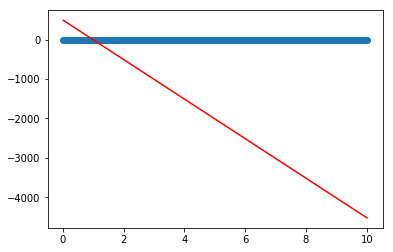

In [156]:
#12Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(dfAsy, dfx)
print('dfAsy:',slope, intercept, r_value, p_value, std_err)
#y = mx+x
y = slope*dfx+intercept

plt.scatter(dfx,dfAsy)
plt.plot(dfx,y,c='r')

In [157]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfC, dfx)
print('dfC:',slope, intercept, r_value, p_value, std_err)

slope, intercept, r_value, p_value, std_err = stats.linregress(dfPi, dfx)
print('dfPi:',slope, intercept, r_value, p_value, std_err)

slope, intercept, r_value, p_value, std_err = stats.linregress(dfSC, dfx)
print('dfSC:',slope, intercept, r_value, p_value, std_err)

slope, intercept, r_value, p_value, std_err = stats.linregress(dfSym, dfx)
print('dfSym:',slope, intercept, r_value, p_value, std_err)

dfC: -154.28997733851796 156.06112915357008 -0.27822877714399125 2.333584171745457e-10 23.84456874615539
dfPi: -767.5770210195652 764.6209576680715 -0.8869671318156054 1.5216552493714213e-169 17.89158051048225
dfSC: -321.47660443150744 324.044723497171 -0.19418486579937103 1.2014552333653727e-05 72.70046886632667
dfSym: 81.50910118874057 -75.62203042466483 0.07560111127309363 0.09095627097943637 48.12635613350774


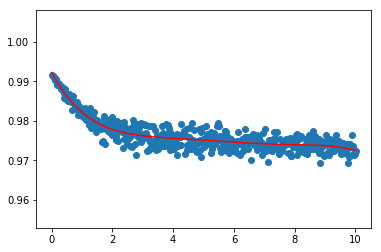

0.8435028994711983


In [158]:
#13Polynomial Regression
p4 = np.poly1d(np.polyfit(dfx, dfAsy, 5))
#xp = np.linspace(0, max(dfx), 100)
xp = np.linspace(0, max(dfx), 100)
plt.scatter(dfx, dfAsy)
plt.plot(xp, p4(xp), c='r')
plt.show()
print(r2_score(dfAsy, p4(dfx)))

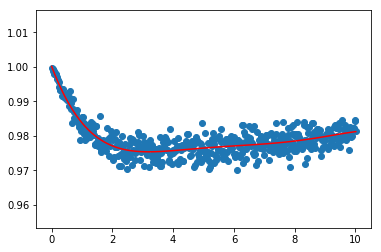

0.7661478924980663


In [159]:
p4 = np.poly1d(np.polyfit(dfx, dfC, 5))
xp = np.linspace(0, max(dfx), 100)
plt.scatter(dfx, dfC)
plt.plot(xp, p4(xp), c='r')
plt.show()
print(r2_score(dfC, p4(dfx)))

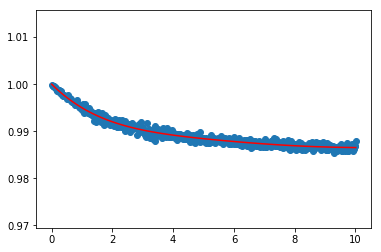

0.972743749753313


In [160]:
p4 = np.poly1d(np.polyfit(dfx, dfPi, 5))
xp = np.linspace(0, max(dfx), 100)
plt.scatter(dfx, dfPi)
plt.plot(xp, p4(xp), c='r')
plt.show()
print(r2_score(dfPi, p4(dfx)))

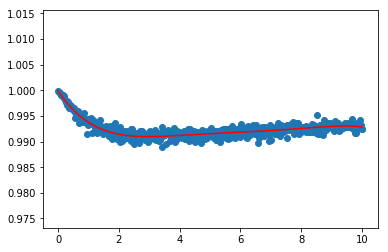

0.8302956411817646


In [161]:
p4 = np.poly1d(np.polyfit(dfx, dfSC, 5))
xp = np.linspace(0, max(dfx), 100)
plt.scatter(dfx, dfSC)
plt.plot(xp, p4(xp), c='r')
plt.show()
print(r2_score(dfSC, p4(dfx)))

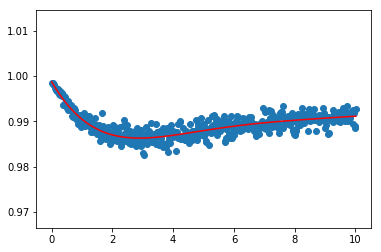

0.7602554582807286


In [162]:
p4 = np.poly1d(np.polyfit(dfx, dfSym, 5))
xp = np.linspace(0, max(dfx), 100)
plt.scatter(dfx, dfSym)
plt.plot(xp, p4(xp), c='r')
plt.show()
print(r2_score(dfSym, p4(dfx)))

r2 score for Training data =  0.8271851858930854
r2 score for Testing data =  0.8948718255171451


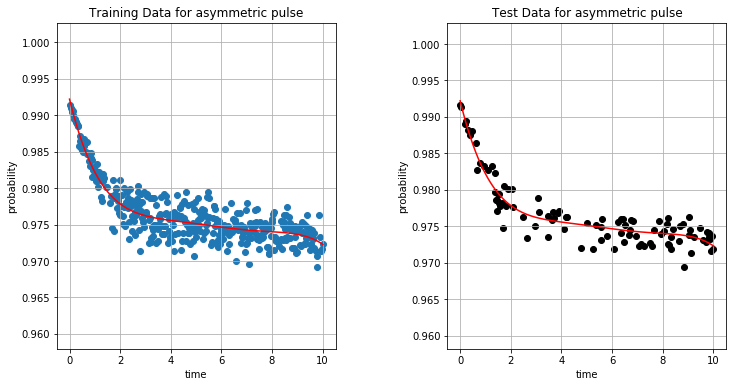

In [163]:
#15Train Test
from sklearn.model_selection import train_test_split
dfx_train, dfx_test, dfAsy_train, dfAsy_test = train_test_split(dfx, dfAsy, test_size=0.2, random_state=42)

p4 = np.poly1d(np.polyfit(dfx_train, dfAsy_train, 5))
xp = np.linspace(0, max(dfx_train), 100)

plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplots_adjust(wspace=0.4) # wspace controls the width of space between subplots
                    #hspace=0.4)  # hspace controls the hight of space between subplots

# asymmetric pulse
plt.subplot(121)
plt.scatter(dfx_train, dfAsy_train)
plt.plot(xp, p4(xp), c='r')
plt.xlabel('time')
plt.ylabel('probability')
plt.title('Training Data for asymmetric pulse')
plt.grid(True)

# asymmetric pulse
plt.subplot(122)
plt.scatter(dfx_test, dfAsy_test, c = 'k')
plt.plot(xp, p4(xp), c='r')
plt.xlabel('time')
plt.ylabel('probability')
plt.title('Test Data for asymmetric pulse')
plt.grid(True)

print('r2 score for Training data = ',r2_score(dfAsy_train, p4(dfx_train)))
print('r2 score for Testing data = ', r2_score(dfAsy_test, p4(dfx_test)))

r2 score for Training data =  0.7515409059824073
r2 score for Testing data =  0.8087839469370841


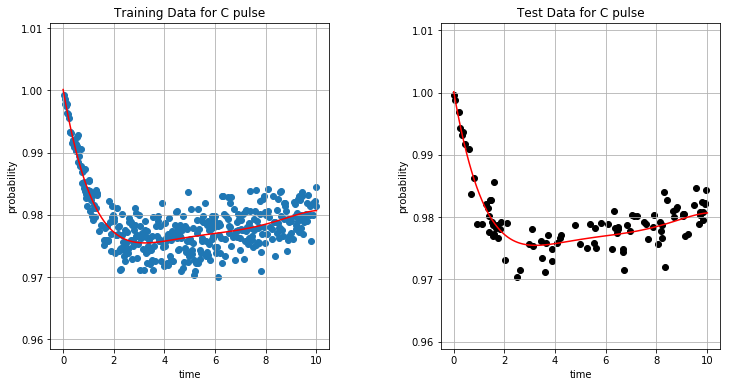

In [164]:
#15Train Test
from sklearn.model_selection import train_test_split
dfx_train, dfx_test, dfC_train, dfC_test = train_test_split(dfx, dfC, test_size=0.2, random_state=42)

p4 = np.poly1d(np.polyfit(dfx_train, dfC_train, 5))
xp = np.linspace(0, max(dfx_train), 100)

plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplots_adjust(wspace=0.4) # wspace controls the width of space between subplots
                    #hspace=0.4)  # hspace controls the hight of space between subplots

# asymmetric pulse
plt.subplot(121)
plt.scatter(dfx_train, dfC_train)
plt.plot(xp, p4(xp), c='r')
plt.xlabel('time')
plt.ylabel('probability')
plt.title('Training Data for C pulse')
plt.grid(True)

# asymmetric pulse
plt.subplot(122)
plt.scatter(dfx_test, dfC_test, c = 'k')
plt.plot(xp, p4(xp), c='r')
plt.xlabel('time')
plt.ylabel('probability')
plt.title('Test Data for C pulse')
plt.grid(True)

print('r2 score for Training data = ',r2_score(dfC_train, p4(dfx_train)))
print('r2 score for Testing data = ', r2_score(dfC_test, p4(dfx_test)))

r2 score for Training data =  0.9714793913486076
r2 score for Testing data =  0.9761408972230353


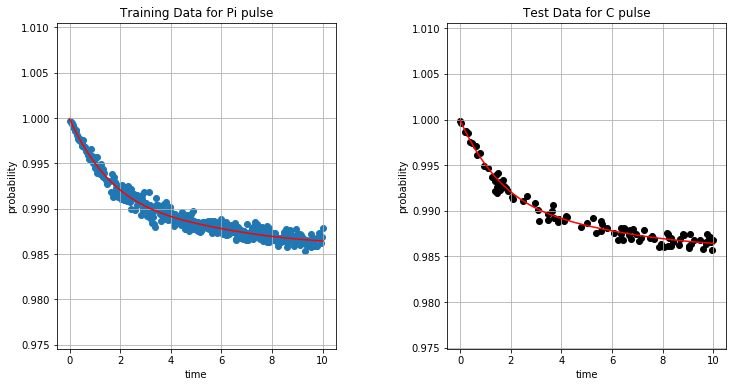

In [165]:
#15Train Test
from sklearn.model_selection import train_test_split
dfx_train, dfx_test, dfPi_train, dfPi_test = train_test_split(dfx, dfPi, test_size=0.2, random_state=42)

p4 = np.poly1d(np.polyfit(dfx_train, dfPi_train, 5))
xp = np.linspace(0, max(dfx_train), 100)

plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplots_adjust(wspace=0.4) # wspace controls the width of space between subplots
                    #hspace=0.4)  # hspace controls the hight of space between subplots

# asymmetric pulse
plt.subplot(121)
plt.scatter(dfx_train, dfPi_train)
plt.plot(xp, p4(xp), c='r')
plt.xlabel('time')
plt.ylabel('probability')
plt.title('Training Data for Pi pulse')
plt.grid(True)

# asymmetric pulse
plt.subplot(122)
plt.scatter(dfx_test, dfPi_test, c = 'k')
plt.plot(xp, p4(xp), c='r')
plt.xlabel('time')
plt.ylabel('probability')
plt.title('Test Data for C pulse')
plt.grid(True)

print('r2 score for Training data = ',r2_score(dfPi_train, p4(dfx_train)))
print('r2 score for Testing data = ', r2_score(dfPi_test, p4(dfx_test)))

r2 score for Training data =  0.8174670515504762
r2 score for Testing data =  0.8686464771209919


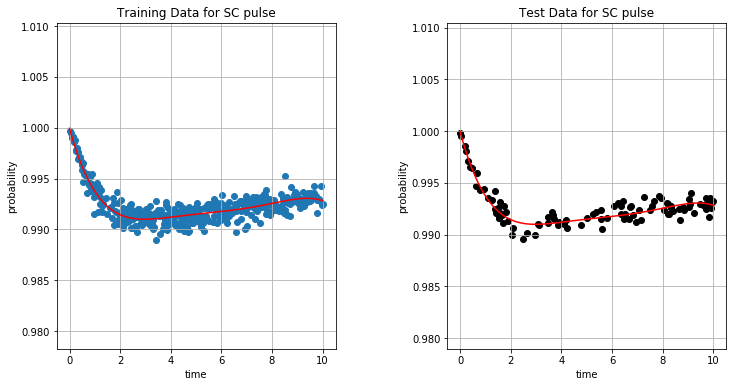

In [166]:
#15Train Test
from sklearn.model_selection import train_test_split
dfx_train, dfx_test, dfSC_train, dfSC_test = train_test_split(dfx, dfSC, test_size=0.2, random_state=42)

p4 = np.poly1d(np.polyfit(dfx_train, dfSC_train, 5))
xp = np.linspace(0, max(dfx_train), 100)

plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplots_adjust(wspace=0.4) # wspace controls the width of space between subplots
                    #hspace=0.4)  # hspace controls the hight of space between subplots

# asymmetric pulse
plt.subplot(121)
plt.scatter(dfx_train, dfSC_train)
plt.plot(xp, p4(xp), c='r')
plt.xlabel('time')
plt.ylabel('probability')
plt.title('Training Data for SC pulse')
plt.grid(True)

# asymmetric pulse
plt.subplot(122)
plt.scatter(dfx_test, dfSC_test, c = 'k')
plt.plot(xp, p4(xp), c='r')
plt.xlabel('time')
plt.ylabel('probability')
plt.title('Test Data for SC pulse')
plt.grid(True)

print('r2 score for Training data = ',r2_score(dfSC_train, p4(dfx_train)))
print('r2 score for Testing data = ', r2_score(dfSC_test, p4(dfx_test)))

r2 score for Training data =  0.7664283515973094
r2 score for Testing data =  0.7098952739055542


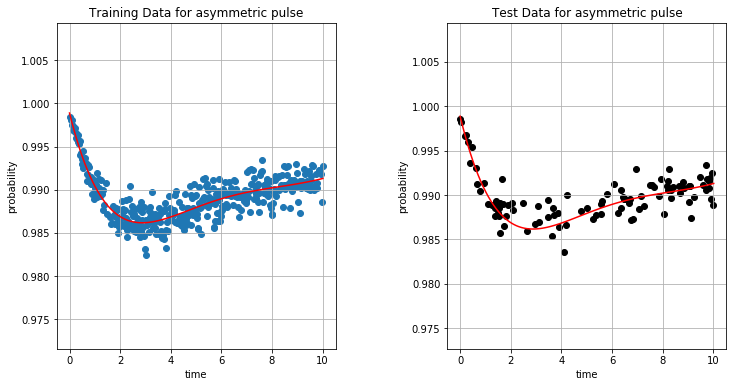

In [167]:
#15Train Test
from sklearn.model_selection import train_test_split
dfx_train, dfx_test, dfSym_train, dfSym_test = train_test_split(dfx, dfSym, test_size=0.2, random_state=42)

p4 = np.poly1d(np.polyfit(dfx_train, dfSym_train, 5))
xp = np.linspace(0, max(dfx_train), 100)

plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplots_adjust(wspace=0.4) # wspace controls the width of space between subplots
                    #hspace=0.4)  # hspace controls the hight of space between subplots

# asymmetric pulse
plt.subplot(121)
plt.scatter(dfx_train, dfSym_train)
plt.plot(xp, p4(xp), c='r')
plt.xlabel('time')
plt.ylabel('probability')
plt.title('Training Data for asymmetric pulse')
plt.grid(True)

# asymmetric pulse
plt.subplot(122)
plt.scatter(dfx_test, dfSym_test, c = 'k')
plt.plot(xp, p4(xp), c='r')
plt.xlabel('time')
plt.ylabel('probability')
plt.title('Test Data for asymmetric pulse')
plt.grid(True)

print('r2 score for Training data = ',r2_score(dfSym_train, p4(dfx_train)))
print('r2 score for Testing data = ', r2_score(dfSym_test, p4(dfx_test)))

In [168]:
#For k-means clustering, put all the data in one bucket
dfK = []
for i in dfAsy:
    dfK.append(i)
for i in dfC:
    dfK.append(i)
for i in dfPi:
    dfK.append(i)
for i in dfSC:
    dfK.append(i)
for i in dfSym:
    dfK.append(i)
dfK    
dfT = []
for i in dfx:
    dfT.append(i)
for i in dfx:
    dfT.append(i)
for i in dfx:
    dfT.append(i)
for i in dfx:
    dfT.append(i)
for i in dfx:
    dfT.append(i)



      x         y
0  0.01  0.991692
1  0.03  0.991465
2  0.05  0.991316
3  0.07  0.991013
4  0.09  0.990723
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[7.03397614 0.98430929]
 [2.99397614 0.98406166]
 [9.03       0.98471065]
 [5.01402367 0.98378644]
 [0.99402414 0.98990774]]
[4 4 4 ... 2 2 2]


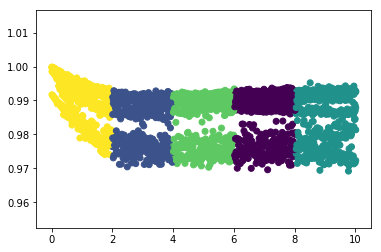

In [169]:
#17KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

df = pd.DataFrame({
    'x': dfT,
    'y': dfK
})

print(df.head())
kmeans = KMeans(n_clusters=5)
print(kmeans.fit(df))
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
print(centroids)
# We can look at the clusters each data point was assigned to
print(kmeans.labels_)

plt.scatter(df['x'], df['y'],c=kmeans.labels_.astype(float))
plt.show()

      x         y
0  0.01  0.991692
1  0.03  0.991465
2  0.05  0.991316
3  0.07  0.991013
4  0.09  0.990723
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[2.5        0.97881161]
 [7.51       0.97408864]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

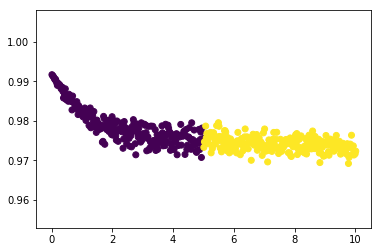

In [170]:
#17KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

df = pd.DataFrame({
    'x': dfx,
    'y': dfAsy
})

print(df.head())
kmeans = KMeans(n_clusters=2)
print(kmeans.fit(df))
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
print(centroids)
# We can look at the clusters each data point was assigned to
print(kmeans.labels_)

plt.scatter(df['x'], df['y'],c=kmeans.labels_.astype(float))
plt.show()

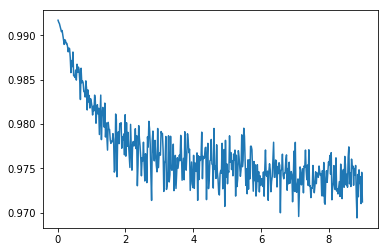

In [171]:
x=dfx[:450]
y = dfAsy[:450]
plt.plot(x,y)

In [172]:
#work in progress for decison tree, tensor flow, CNN, pytorch
df = pd.DataFrame({
    'Asym': dfAsy,
    'C': dfC,
    'Pi': dfPi,
    'SC': dfSC,
    'Sym': dfSym,
    'x-axis': dfx
})
df.head()

,Asym,C,Pi,SC,Sym,x-axis
0,0.991692,0.999672,0.999787,0.999846,0.998549,0.01
1,0.991465,0.999328,0.999701,0.999679,0.998428,0.03
2,0.991316,0.998902,0.999644,0.999526,0.998209,0.05
3,0.991013,0.998696,0.999601,0.999516,0.998070,0.07
4,0.990723,0.997780,0.999505,0.999164,0.998065,0.09


In [173]:
df.describe()

,Asym,C,Pi,SC,Sym,x-axis
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.00000
mean,0.976445,0.979008,0.989622,0.992404,0.989240,5.01000
std,0.004280,0.005221,0.003346,0.001749,0.002686,2.89541
min,0.969178,0.970025,0.985380,0.988909,0.982492,0.01000
25%,0.973644,0.975923,0.987208,0.991343,0.987298,2.51000
50%,0.975271,0.978181,0.988448,0.992120,0.989210,5.01000
75%,0.977942,0.980618,0.991194,0.992983,0.990661,7.51000
max,0.991692,0.999672,0.999787,0.999846,0.998549,10.01000


In [174]:
#Now we have numpy array
all_features = df[[ 'Asym', 'C','Pi', 'SC', 'Sym']].values


all_classes = df['x-axis'].values

feature_names = ['Asym', 'C','Pi', 'SC', 'Sym']

all_features[:5]



array([[0.99169206, 0.99967242, 0.99978679, 0.99984584, 0.99854873],
       [0.99146543, 0.9993279 , 0.99970052, 0.99967893, 0.99842787],
       [0.99131616, 0.99890231, 0.99964361, 0.99952591, 0.99820882],
       [0.9910126 , 0.99869627, 0.99960108, 0.999516  , 0.99807042],
       [0.9907225 , 0.99777964, 0.99950536, 0.99916374, 0.99806471]])